In [2]:
from sklearn.datasets import load_iris
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [3]:
regression_data = np.genfromtxt('ENB2012_data.csv', delimiter=',')

In [4]:
print(regression_data)
print(regression_data.shape)

[[      nan       nan       nan ...       nan       nan       nan]
 [9.800e-01 5.145e+02 2.940e+02 ... 0.000e+00 1.555e+01 2.133e+01]
 [9.800e-01 5.145e+02 2.940e+02 ... 0.000e+00 1.555e+01 2.133e+01]
 ...
 [6.200e-01 8.085e+02 3.675e+02 ... 5.000e+00 1.644e+01 1.711e+01]
 [6.200e-01 8.085e+02 3.675e+02 ... 5.000e+00 1.648e+01 1.661e+01]
 [6.200e-01 8.085e+02 3.675e+02 ... 5.000e+00 1.664e+01 1.603e+01]]
(769, 10)


In [5]:
regression_data = np.delete(regression_data,(0), axis=0)
print(regression_data)
print(regression_data.shape)

[[9.800e-01 5.145e+02 2.940e+02 ... 0.000e+00 1.555e+01 2.133e+01]
 [9.800e-01 5.145e+02 2.940e+02 ... 0.000e+00 1.555e+01 2.133e+01]
 [9.800e-01 5.145e+02 2.940e+02 ... 0.000e+00 1.555e+01 2.133e+01]
 ...
 [6.200e-01 8.085e+02 3.675e+02 ... 5.000e+00 1.644e+01 1.711e+01]
 [6.200e-01 8.085e+02 3.675e+02 ... 5.000e+00 1.648e+01 1.661e+01]
 [6.200e-01 8.085e+02 3.675e+02 ... 5.000e+00 1.664e+01 1.603e+01]]
(768, 10)


In [6]:
regression_inputs = np.take(regression_data, (0,1,2,3,4,5,6,7), axis =1)
regression_targets = np.take(regression_data, (8,9), axis = 1)

In [7]:
print(regression_inputs)
print(regression_inputs.shape)
print(regression_targets)
print(regression_targets.shape)

[[9.800e-01 5.145e+02 2.940e+02 ... 2.000e+00 0.000e+00 0.000e+00]
 [9.800e-01 5.145e+02 2.940e+02 ... 3.000e+00 0.000e+00 0.000e+00]
 [9.800e-01 5.145e+02 2.940e+02 ... 4.000e+00 0.000e+00 0.000e+00]
 ...
 [6.200e-01 8.085e+02 3.675e+02 ... 3.000e+00 4.000e-01 5.000e+00]
 [6.200e-01 8.085e+02 3.675e+02 ... 4.000e+00 4.000e-01 5.000e+00]
 [6.200e-01 8.085e+02 3.675e+02 ... 5.000e+00 4.000e-01 5.000e+00]]
(768, 8)
[[15.55 21.33]
 [15.55 21.33]
 [15.55 21.33]
 ...
 [16.44 17.11]
 [16.48 16.61]
 [16.64 16.03]]
(768, 2)


In [8]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(regression_inputs, regression_targets, test_size=0.2, random_state=50)

In [9]:
print(inputs_train.shape, inputs_test.shape)

(614, 8) (154, 8)


In [10]:
Linear_Regression_Model = linear_model.LinearRegression().fit(inputs_train, targets_train)

In [11]:
Linear_Regression_Model.coef_

array([[-6.22491703e+01,  2.37915217e+11, -2.37915217e+11,
        -4.75830433e+11,  4.30936220e+00,  3.76627081e-02,
         1.95811584e+01,  2.32998456e-01],
       [-6.86976808e+01,  2.09962851e+09, -2.09962851e+09,
        -4.19925703e+09,  4.53047242e+00,  1.82270165e-01,
         1.51893847e+01,  6.88702653e-02]])

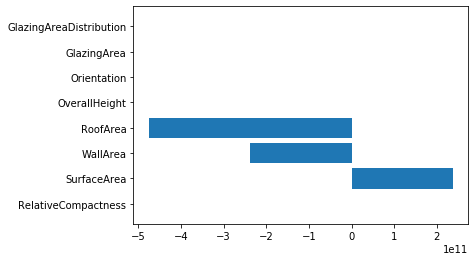

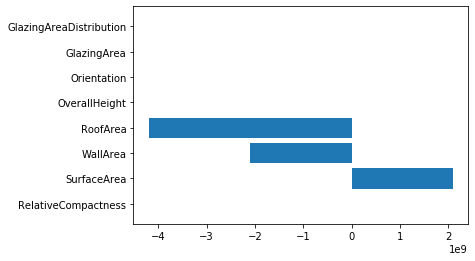

In [12]:
plt.barh(('RelativeCompactness','SurfaceArea','WallArea','RoofArea','OverallHeight','Orientation','GlazingArea','GlazingAreaDistribution'),Linear_Regression_Model.coef_[0])
plt.show()
plt.barh(('RelativeCompactness','SurfaceArea','WallArea','RoofArea','OverallHeight','Orientation','GlazingArea','GlazingAreaDistribution'),Linear_Regression_Model.coef_[1])
plt.show()

In [13]:
Lasso_Regression_Model = linear_model.Lasso().fit(inputs_train, targets_train)

In [14]:
print(Lasso_Regression_Model.coef_)

[[-0.         -0.07644683  0.12756715 -0.02363161  0.          0.
   0.          0.18013357]
 [-0.         -0.07342127  0.11502316 -0.02130786  0.          0.
   0.          0.        ]]


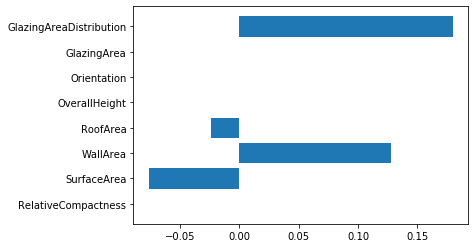

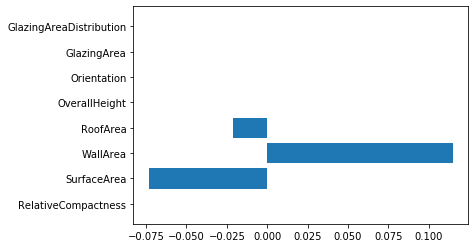

In [15]:
plt.barh(('RelativeCompactness','SurfaceArea','WallArea','RoofArea','OverallHeight','Orientation','GlazingArea','GlazingAreaDistribution'),Lasso_Regression_Model.coef_[0])
plt.show()
plt.barh(('RelativeCompactness','SurfaceArea','WallArea','RoofArea','OverallHeight','Orientation','GlazingArea','GlazingAreaDistribution'),Lasso_Regression_Model.coef_[1])
plt.show()

In [16]:
Ridge_Regression_Model = linear_model.Ridge().fit(inputs_train, targets_train)

[[-3.95657598e+00  1.43993652e-02  3.15028534e-02 -8.55174349e-03
   5.50110987e+00  4.13598253e-02  1.78007021e+01  2.63812325e-01]
 [-4.34668560e+00  1.95467418e-02  1.68701448e-02  1.33829905e-03
   5.83598719e+00  1.86730549e-01  1.37962446e+01  9.22173048e-02]]


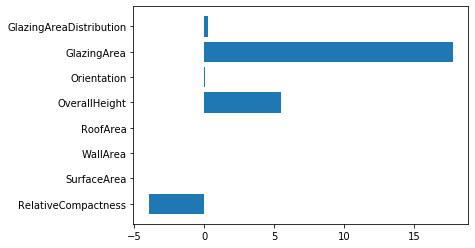

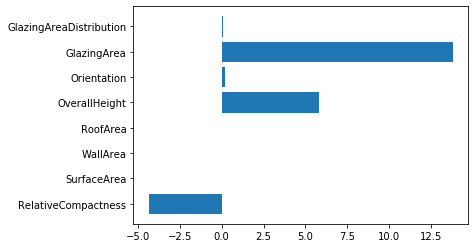

In [17]:
print(Ridge_Regression_Model.coef_)
plt.barh(('RelativeCompactness','SurfaceArea','WallArea','RoofArea','OverallHeight','Orientation','GlazingArea','GlazingAreaDistribution'),Ridge_Regression_Model.coef_[0])
plt.show()
plt.barh(('RelativeCompactness','SurfaceArea','WallArea','RoofArea','OverallHeight','Orientation','GlazingArea','GlazingAreaDistribution'),Ridge_Regression_Model.coef_[1])
plt.show()

In [18]:
print(Linear_Regression_Model.score(inputs_test,targets_test))
print(Lasso_Regression_Model.score(inputs_test,targets_test))
print(Ridge_Regression_Model.score(inputs_test,targets_test))

0.8886330661245849
0.7780129204956062
0.8825825475896739


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').


In [33]:
print(Linear_Regression_Model.predict(inputs_test)[0:6,0])
print(Lasso_Regression_Model.predict(inputs_test)[0:6,0])
print(Ridge_Regression_Model.predict(inputs_test)[0:6,0])
print(targets_test[0:6,0])

[18.26605863 28.92230863  9.47699613 39.35980863 33.71918363 24.13324613]
[16.66154796 27.67166035 11.83189008 36.46592023 36.64605379 25.69867822]
[18.95327193 29.08834557  9.02236437 37.87688001 32.80048172 24.97015866]
[17.14 23.59 10.68 40.71 33.12 19.34]
